# **Adding Gaussian Noise and Implementing Otsu’s Algorithm**

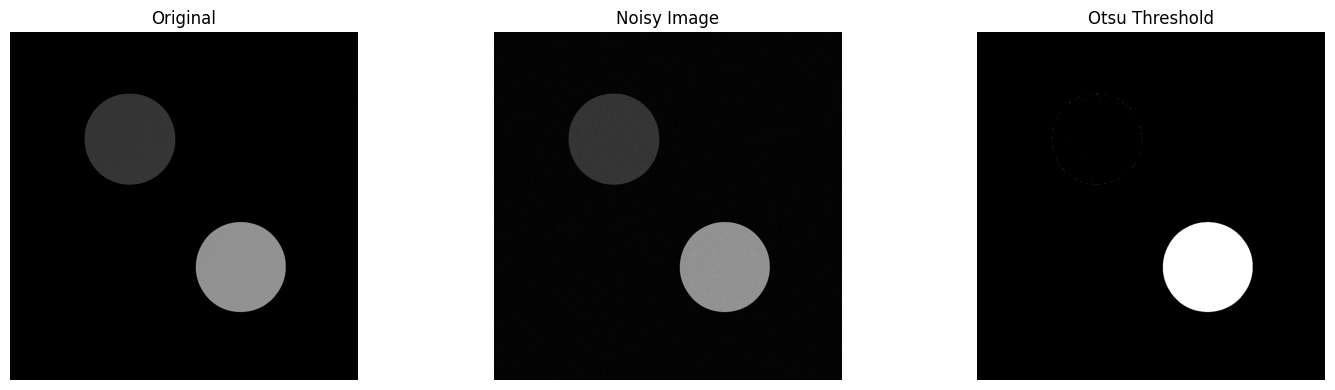

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load original RGB image
image = cv2.imread("images/input.png")  # BGR format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format

# Step 2: Add Gaussian noise to the image
noise = np.random.normal(0, 10, image_rgb.shape).astype(np.int16)  # Gaussian noise with mean 0 and std 10
noisy_image = np.clip(image_rgb.astype(np.int16) + noise, 0, 255).astype(np.uint8)  # Adding noise and clipping values between 0 and 255

# Save the noisy image
cv2.imwrite("outputs/task1/noisy_image.png", cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))  # Save noisy image in BGR format

# Step 3: Convert noisy image to grayscale for Otsu's thresholding
gray = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)  # Convert RGB noisy image to grayscale

# Step 4: Apply Otsu’s thresholding
_, otsu_result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Otsu's thresholding

# Save the output after Otsu’s thresholding
cv2.imwrite("outputs/task1/otsu_segmented.png", otsu_result)  # Save thresholded image

# Step 5: Display the results
plt.figure(figsize=(15, 4))  # Set figure size for visualization

# Display the original image
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image_rgb)  # Show the original image
plt.axis("off")  # Hide the axis for clarity

# Display the noisy image
plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image)  # Show the noisy image
plt.axis("off")  # Hide the axis

# Display the Otsu thresholded image
plt.subplot(1, 3, 3)
plt.title("Otsu Threshold")
plt.imshow(otsu_result, cmap='gray')  # Show the result of Otsu’s thresholding in grayscale
plt.axis("off")  # Hide the axis

plt.tight_layout()  # Adjust the layout to ensure no overlapping
plt.show()  # Display all the images
